In [6]:
!ls /content/drive/MyDrive/20220821-Python-第四階段-Sun/chap01-skimage-color/train.zip

/content/drive/MyDrive/20220821-Python-第四階段-Sun/chap01-skimage-color/train.zip


In [7]:
!cp /content/drive/MyDrive/20220821-Python-第四階段-Sun/chap01-skimage-color/train.zip ./
!cp /content/drive/MyDrive/20220821-Python-第四階段-Sun/chap01-skimage-color/train_labels.csv ./

In [8]:
!mkdir -p ./images
!mv ./*.zip ./images

In [ ]:
!unzip ./images/train.zip 

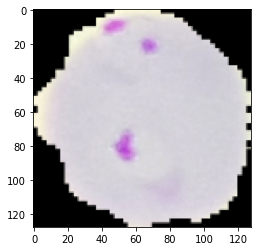

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(  plt.imread('./train/00001.jpg') ) 
plt.show()

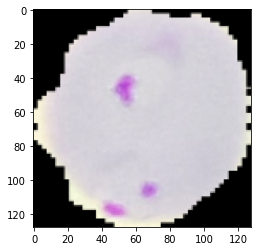

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow( np.flipud( plt.imread('./train/00001.jpg') ) )
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


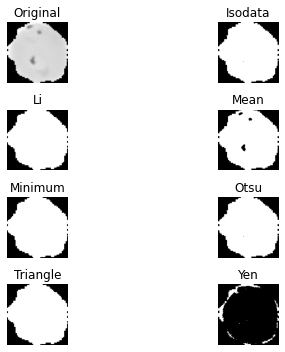

In [14]:
##################
from skimage import color
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(color.rgb2gray(plt.imread('./train/00001.jpg')))
#################

In [ ]:
# from skimage import filters
# local_thresh = filters.threshold_local(image = X_train[0].reshape(28, 28), 
#                                        block_size = 5, 
#                                        offset = 1 )
# print(local_thresh.shape)
# binary = X_train[0].reshape(28, 28) > local_thresh
# plt.imshow(binary, cmap='gray_r')
# plt.show()
################HomeWork
from skimage import color
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(color.rgb2gray(plt.imread('./train/00001.jpg')))
#################

In [ ]:
!ls ./train/* |wc

  21765   21765  391770


In [ ]:
# 將所有 ./train/圖片讀取過程 對應到label
import pandas as pd
target = pd.read_csv('train_labels.csv')
target[:3]

,filename,infected
0,00000.jpg,1
1,00001.jpg,1
2,00002.jpg,1


In [ ]:
# 抽絲剝繭 怎樣找到 17705.jpg 對應的 infected 結果
target[target.filename=='17705.jpg'].infected.values[0]

1

In [ ]:
%%time
# 請將所有 ./train/圖片讀取到python的變數
malaria = []       # 實體檔案內容
malaria_files = [] # 檔案名稱
malaria_target = []# 對應infected(1, 0)
import os
from tqdm import tqdm
from skimage import color
import matplotlib.pyplot as plt
for root, dirs, files in os.walk('./train/'):
    for f in tqdm(files[:]):  
        #print(root + f)      
        # malaria.append(  plt.imread(root + f) )
        #請從這邊處理轉換成灰階
        malaria.append(  color.rgb2gray(plt.imread(root + f)) )
        malaria_files.append(f)
        malaria_target.append(target[target.filename==f].infected.values[0])

100%|██████████| 21765/21765 [01:16<00:00, 284.46it/s]

CPU times: user 1min 10s, sys: 3.34 s, total: 1min 13s
Wall time: 1min 16s


In [ ]:
# 對應檔案名稱結果
malaria_target[:3]

[1, 0, 1]

In [ ]:
# 對應檔案名稱
sample_file = malaria_files[1]
print(sample_file)

07757.jpg


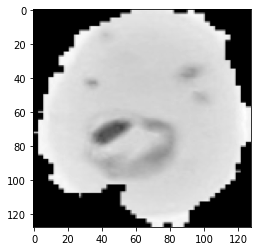

In [ ]:
# 列印圖片
sample = malaria[0]
plt.imshow(sample, cmap='gray')
plt.show()